### Test

In [1]:
from src.test import calculate_metrics_all_models

# Define model list
model_dict = {
    "Qwen/Qwen2-VL-7B-Instruct": "qwen2_vl_7b",
    "llava-hf/llava-1.5-7b-hf": "llava_1_5_7b",
    #"llava-hf/llava-v1.6-mistral-7b-hf": "llava_1_6_mistral",
    #"llava-hf/llava-v1.6-vicuna-7b-hf": "llava_1_6_vicuna",
    #"llava-hf/llama3-llava-next-8b-hf": "llama3_llava_8b",
    "google/paligemma2-10b-pt-224": 'paligemma2_10b',
    #"google/paligemma2-3b-pt-22": 'paligemma2_3b',
    "deepseek-ai/Janus-Pro-7B": 'janus_pro_7b',
    "PanaceaAI/BiomedGPT-Base-Pretrained": "biomedgpt",
    "microsoft/llava-med-v1.5-mistral-7b": "llava_med_mistral_instruct",
    "google/medgemma-4b-it": 'medgemma',
    "meta-llama/Llama-3.2-11B-Vision-Instruct": "llama3_10b"
    
}

data = calculate_metrics_all_models(model_dict, results_dir='results', dataset="mimic", subgroup_variables=[], counterfactual=True, first_token=False, confusion_matrix=False, show_unknown_responses=False, calibration=False)


/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/transformers/utils/hub.py:105: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


======================================== Metrics for qwen2_vl_7b ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics ========================================
Accuracy: 0.8020
Precision: 0.9536
Recall: 0.7413
Specificity: 0.9263
======================================== Metrics for Image Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics ========================================
Accuracy: 0.8018
Precision: 0.9549
Recall: 0.7399
Specificity: 0.9284
======================================== Metrics for Text Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics ========================================
Accuracy: 0.1326


/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


======================================== Overall Metrics ========================================
Accuracy: 0.4689
Precision: 0.8884
Recall: 0.2394
Specificity: 0.9385



======================================== Metrics for janus_pro_7b ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics ========================================
Accuracy: 0.7515
Precision: 0.9612
Recall: 0.6565
Specificity: 0.9458
======================================== Metrics for Image Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics ========================================
Accuracy: 0.7515
Precision: 0.9612
Recall: 0.6565
Specificity: 0.9458
======================================== Metrics for Text Shift ===========================

/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


======================================== Overall Metrics ========================================
Accuracy: 0.6717
Precision: 0.6717
Recall: 1.0000
Specificity: 0.0000



======================================== Metrics for biomedgpt ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 9093
======================================== Overall Metrics ========================================
Accuracy: 0.3475
Precision: 0.7700
Recall: 0.0129
Specificity: 0.9926
======================================== Metrics for Image Shift ========================================
Excluding 0 unknown responses out of 9200
======================================== Overall Metrics ========================================
Accuracy: 0.3288
Precision: 0.5192
Recall: 0.0087
Specificity: 0.9834
======================================== Metrics for Text Shift ================================

### Generate Plot

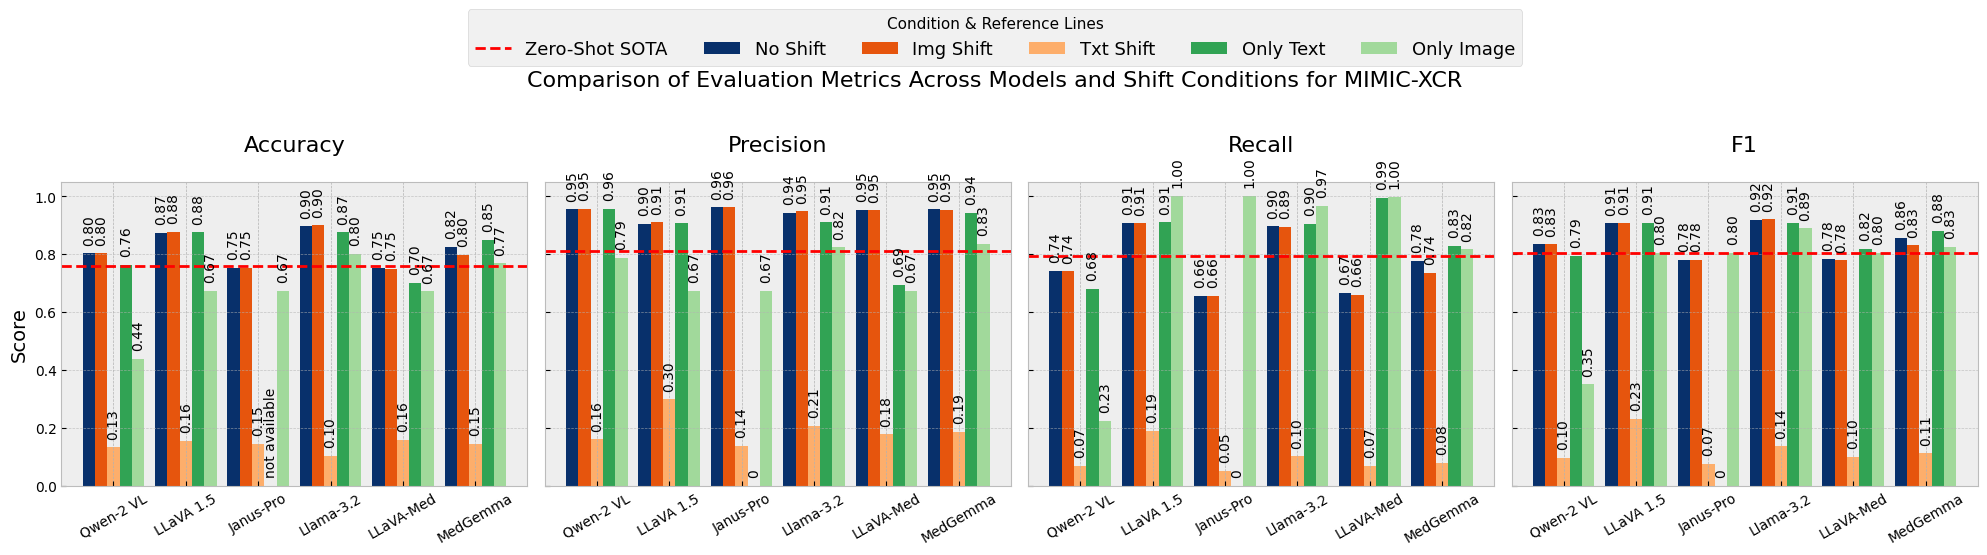

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use a clean style for a professional look
plt.style.use('bmh')

# Sample data (replace with your actual computed values)
models = ["Qwen-2 VL", "LLaVA 1.5", "Janus-Pro", "Llama-3.2", "LLaVA-Med", "MedGemma"]
shifts = ["No Shift", "Img Shift", "Txt Shift", "Only Text", "Only Image"]
metrics = ["Accuracy", "Precision", "Recall", "F1"]

# Data structure: {model: {shift: {metric: value}}} with actual MIMIC values
data 

# Compute F1 for each model/shift from Precision and Recall
for model in data:
    for shift in data[model]:
        p = data[model][shift]["Precision"]
        r = data[model][shift]["Recall"]
        if np.isnan(p) or np.isnan(r):
            data[model][shift]["F1"] = np.nan
        elif (p + r == 0):
            data[model][shift]["F1"] = 0
        else:
            data[model][shift]["F1"] = 2 * p * r / (p + r)

# Define zero-shot and in-context SOTA values (converted to decimals)
SOTA_zero_shot = {"Accuracy": 0.7579, "Precision": 0.8101, "Recall": 0.7938, "F1": 0.8049}
SOTA_in_context = {"Accuracy": 0.8392, "Precision": 0.8701, "Recall": 0.8289, "F1": 0.8749}    


# Define colors for bar groups
shift_colors = {
    "No Shift": "#08306B",
    "Img Shift": "#E6550D",
    "Txt Shift": "#FDAE6B",
    "Only Text": "#31A354",
    "Only Image": "#A1D99B"
}

fig, axs = plt.subplots(1, len(metrics), figsize=(20, 5), sharey=True)

for idx, metric in enumerate(metrics):
    ax = axs[idx]
    x = np.arange(len(models))
    width = 0.17  # Width of each bar

    # Plot bars for each shift condition
    for i, shift in enumerate(shifts):
        values = [data[model][shift][metric] for model in models]
        bars = ax.bar(x + i * width, values, width, label=shift, color=shift_colors[shift])
        
        # Annotate bars
        for bar in bars:
            yval = bar.get_height()
            if np.isnan(yval):
                label_text = "not available"
                yval = 0.0
            elif yval == 0:
                label_text = "0"
            else:
                label_text = f"{yval:.2f}"
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.03, label_text, 
                    ha='center', va='bottom', fontsize=10, rotation=90)

    ax.axhline(y=SOTA_zero_shot[metric], color='red', linestyle='--', label='Zero-Shot SOTA')
    #ax.axhline(y=SOTA_in_context[metric], color='green', linestyle=':', label='In-Context SOTA')


    ax.set_xticks(x + (len(shifts) - 1) * width / 2)
    ax.set_xticklabels(models, fontsize=10, rotation=30)
    ax.set_title(metric, fontsize=16, pad=22)
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    if idx == 0:
        ax.set_ylabel("Score", fontsize=14)

# Extract handles and labels from the last subplot to combine into a single legend
handles1, labels1 = axs[-1].get_legend_handles_labels()
# Some handles will be duplicates from repeated axhline calls; use dict to preserve unique order
unique = dict(zip(labels1, handles1))
fig.legend(unique.values(), unique.keys(),
           title="Condition & Reference Lines",
           loc='upper center', ncol=2 + len(shifts),
           fontsize=13, title_fontsize=11, bbox_to_anchor=(0.5, 1.12))

fig.suptitle("Comparison of Evaluation Metrics Across Models and Shift Conditions for MIMIC-XCR", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("images/metrics_mimic_sota.png", bbox_inches="tight", dpi=300)
plt.show()

### Negative flip rate

In [3]:
from src.test import compute_nfr_all_models, plot_nfr_heatmap

# Define model list
model_dict = {
    "Qwen/Qwen2-VL-7B-Instruct": "qwen2_vl_7b",
    "llava-hf/llava-1.5-7b-hf": "llava_1_5_7b",
    #"llava-hf/llava-v1.6-mistral-7b-hf": "llava_1_6_mistral",
    #"llava-hf/llava-v1.6-vicuna-7b-hf": "llava_1_6_vicuna",
    #"llava-hf/llama3-llava-next-8b-hf": "llama3_llava_8b",
    #"google/paligemma2-10b-pt-224": 'paligemma2_10b',
    #"google/paligemma2-3b-pt-22": 'paligemma2_3b',
    "deepseek-ai/Janus-Pro-7B": 'janus_pro_7b',
    "meta-llama/Llama-3.2-11B-Vision-Instruct": "llama3_10b",
    
    #"PanaceaAI/BiomedGPT-Base-Pretrained": "biomedgpt",
    "microsoft/llava-med-v1.5-mistral-7b": "llava_med_mistral_instruct",
    "google/medgemma-4b-it": 'medgemma'
}

nfr_matrix = compute_nfr_all_models(model_dict,
                                    results_dir="results",
                                    dataset="mimic",
                                    id="dicom_id")


In [4]:
nfr_matrix

Shift,Image,Text,Only Text,Only Image
qwen2_vl_7b,0.005900,0.689200,0.046600,0.414300
llava_1_5_7b,0.009500,0.733400,0.022200,0.263900
janus_pro_7b,0.000000,0.624400,NaN,0.310500
llama3_10b,0.003388,0.791233,0.018173,0.140071
llava_med_mistral_instruct,0.031329,0.614833,0.273003,0.304586
medgemma,0.036600,0.696400,0.015000,0.141000


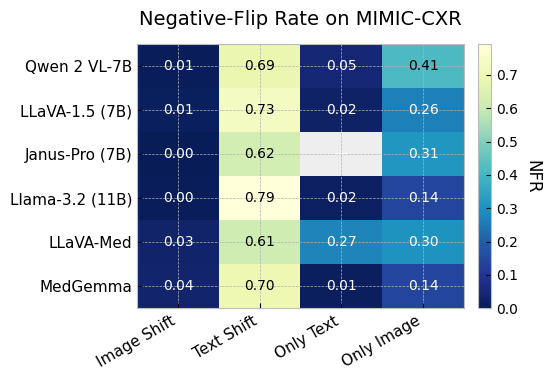

In [5]:
pretty_names = {
    "qwen2_vl_7b":        "Qwen 2 VL-7B",
    "llava_1_5_7b":       "LLaVA-1.5 (7B)",
    "paligemma2_10b":     "PaliGemma-2 (10B)",
    "janus_pro_7b":       "Janus-Pro (7B)",
    "biomedgpt":          "BiomedGPT",
    "llava_med_mistral_instruct": "LLaVA-Med",
    "medgemma":           "MedGemma",
    "llama3_10b":         "Llama-3.2 (11B)",
}

plot_nfr_heatmap(nfr_matrix,
                 dataset_name="MIMIC-CXR",
                 model_name_map=pretty_names,
                 save_path="images/nfr_mimic_heatmap.png")


### First Token

/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/transformers/utils/hub.py:105: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


======================================== Metrics for qwen2_vl_7b ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8294
Precision: 0.9434
Recall: 0.7937
Specificity: 0.9025
Mean Entropy: 0.6190 ± 0.0343
Mean Cross-Entropy: 1.0595 ± 0.3060


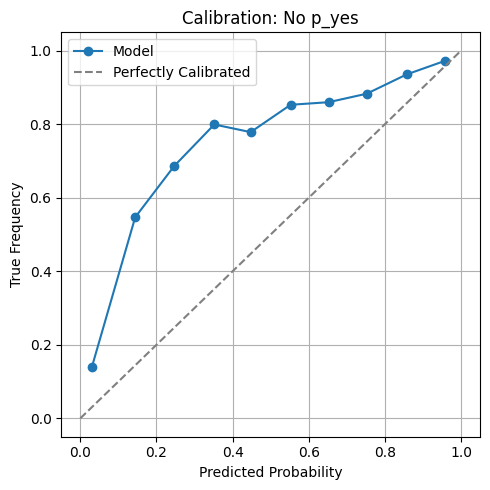

Expected Calibration Error (ECE): 0.1271
======================================== Metrics for Image Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8289
Precision: 0.9436
Recall: 0.7926
Specificity: 0.9031
Mean Entropy: 0.6189 ± 0.0343
Mean Cross-Entropy: 1.0598 ± 0.3060


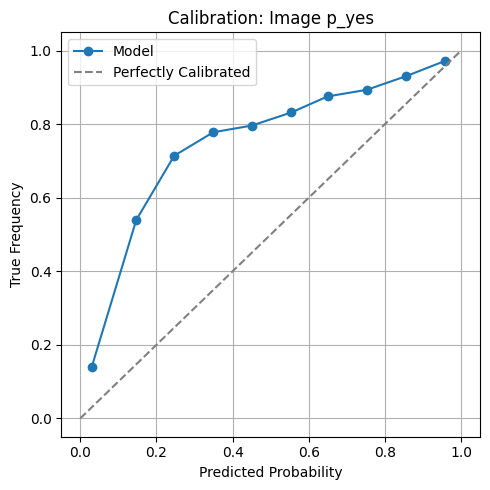

Expected Calibration Error (ECE): 0.1276
======================================== Metrics for Text Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.1331
Precision: 0.1978
Recall: 0.0951
Specificity: 0.2108
Mean Entropy: 0.6124 ± 0.0322
Mean Cross-Entropy: 0.4483 ± 0.2431


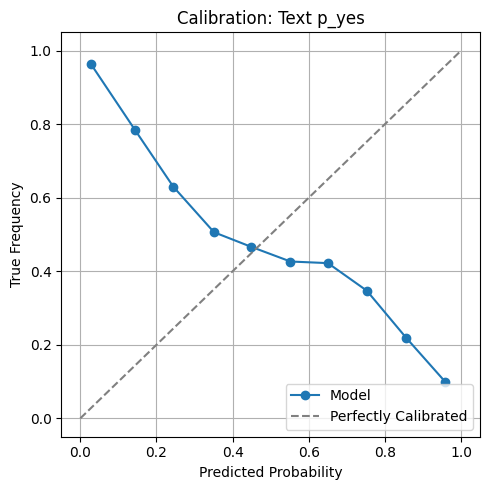

Expected Calibration Error (ECE): 0.7724
======================================== Metrics for Only_text Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.7993
Precision: 0.9467
Recall: 0.7430
Specificity: 0.9144
Mean Entropy: 0.6218 ± 0.0337
Mean Cross-Entropy: 1.0248 ± 0.3214


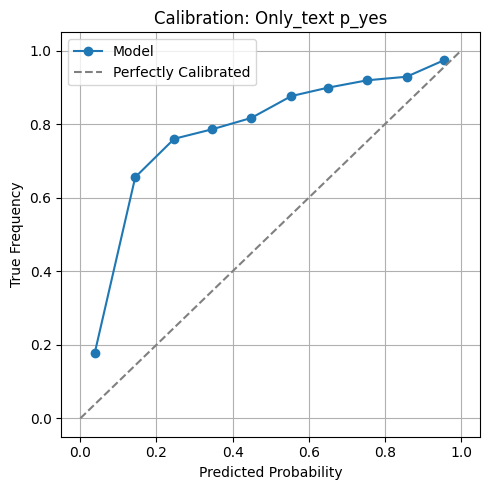

Expected Calibration Error (ECE): 0.1628
======================================== Metrics for Only_image Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.4917
Precision: 0.7651
Recall: 0.3510
Specificity: 0.7795
Mean Entropy: 0.6833 ± 0.0113
Mean Cross-Entropy: 0.7044 ± 0.1431


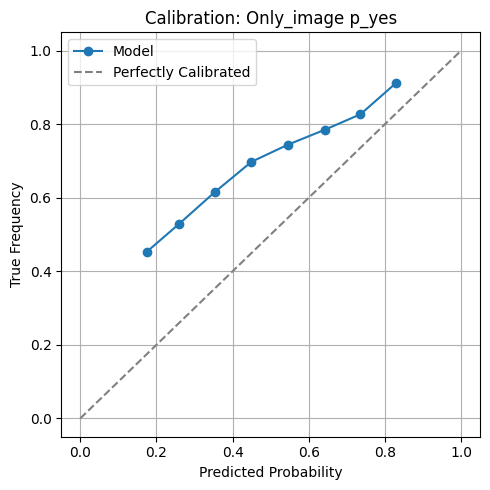

Expected Calibration Error (ECE): 0.2313





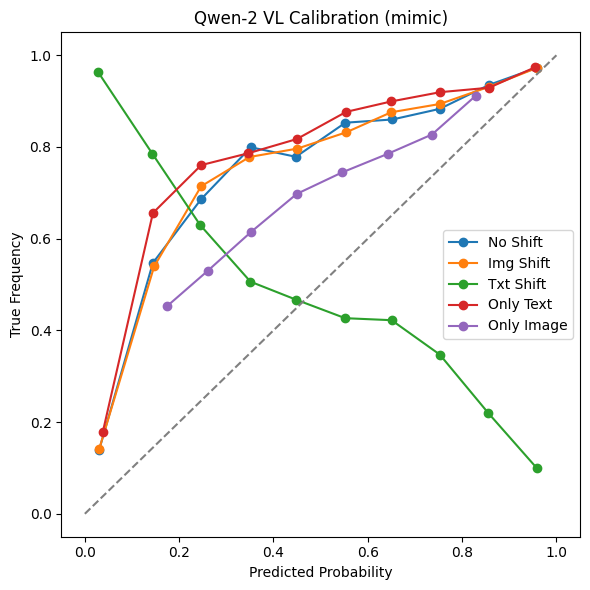

======================================== Metrics for llava_1_5_7b ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.7925
Precision: 0.9502
Recall: 0.7293
Specificity: 0.9217
Mean Entropy: 0.6800 ± 0.0126
Mean Cross-Entropy: 0.8144 ± 0.1340


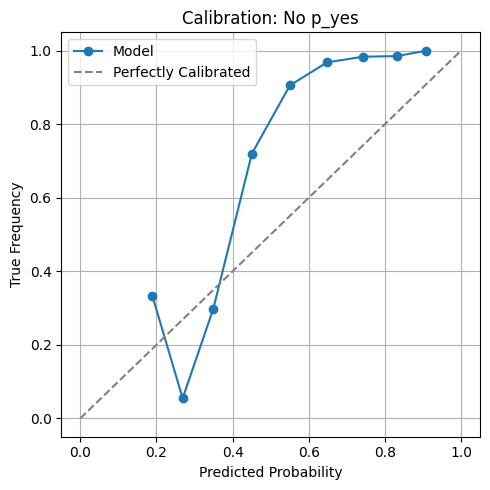

Expected Calibration Error (ECE): 0.2420
======================================== Metrics for Image Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.7891
Precision: 0.9502
Recall: 0.7240
Specificity: 0.9223
Mean Entropy: 0.6798 ± 0.0127
Mean Cross-Entropy: 0.8149 ± 0.1348


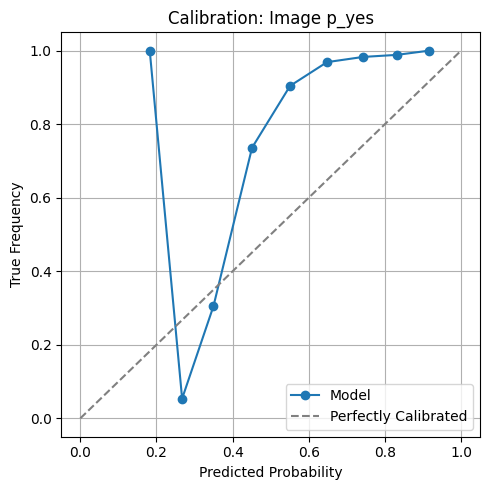

Expected Calibration Error (ECE): 0.2431
======================================== Metrics for Text Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.1455
Precision: 0.1895
Recall: 0.0831
Specificity: 0.2732
Mean Entropy: 0.6783 ± 0.0116
Mean Cross-Entropy: 0.5766 ± 0.1062


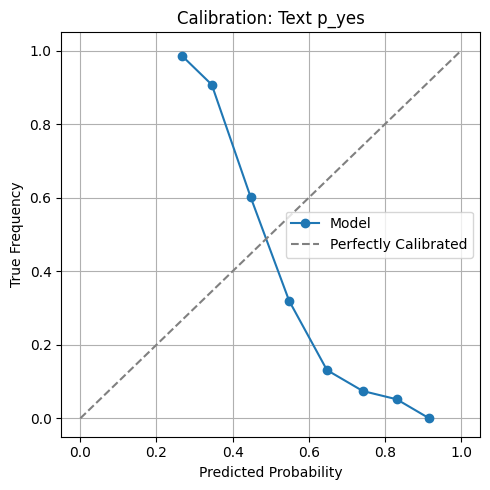

Expected Calibration Error (ECE): 0.5104
======================================== Metrics for Only_text Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8688
Precision: 0.9078
Recall: 0.8956
Specificity: 0.8139
Mean Entropy: 0.6630 ± 0.0246
Mean Cross-Entropy: 0.9177 ± 0.1825


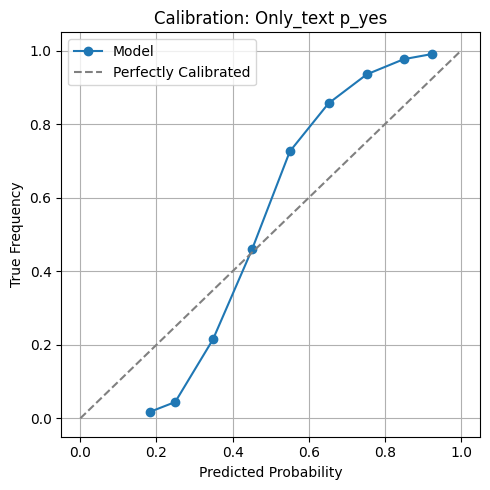

Expected Calibration Error (ECE): 0.1480
======================================== Metrics for Only_image Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.5134
Precision: 0.7819
Recall: 0.3822
Specificity: 0.7819
Mean Entropy: 0.6925 ± 0.0008
Mean Cross-Entropy: 0.6959 ± 0.0363


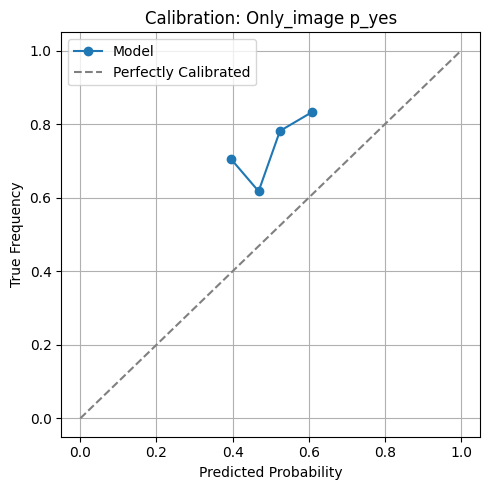

Expected Calibration Error (ECE): 0.1873





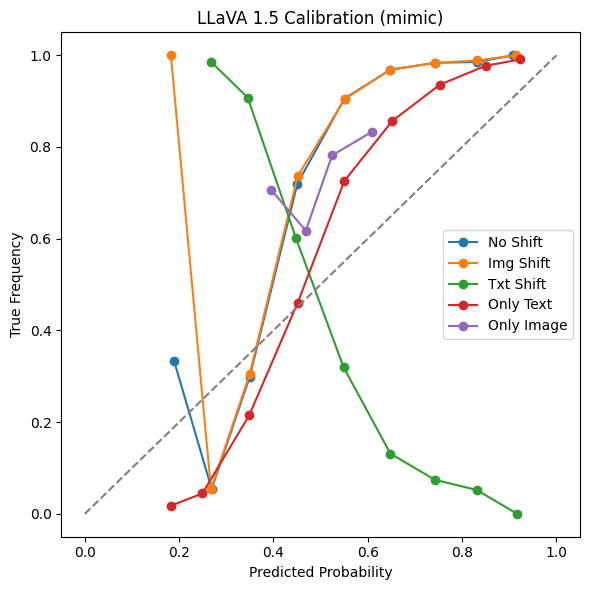

======================================== Metrics for janus_pro_7b ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8502
Precision: 0.8709
Recall: 0.9122
Specificity: 0.7234
Mean Entropy: 0.6752 ± 0.0193
Mean Cross-Entropy: 0.8458 ± 0.1555


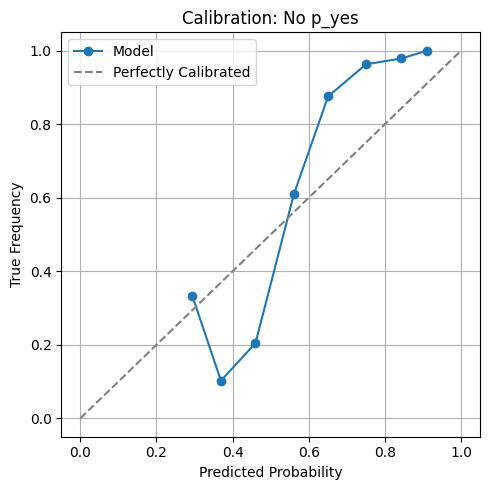

Expected Calibration Error (ECE): 0.1781
======================================== Metrics for Image Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8502
Precision: 0.8709
Recall: 0.9122
Specificity: 0.7234
Mean Entropy: 0.6752 ± 0.0193
Mean Cross-Entropy: 0.8458 ± 0.1555


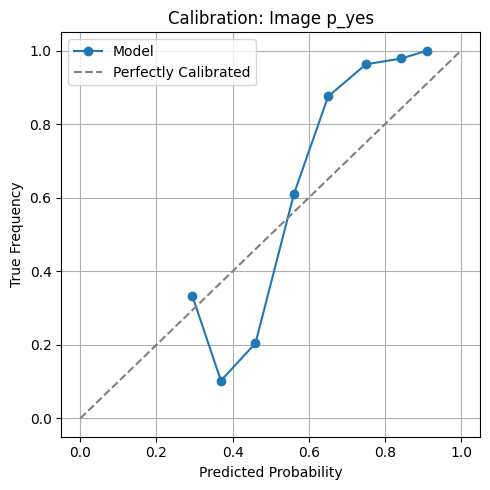

Expected Calibration Error (ECE): 0.1781
======================================== Metrics for Text Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.2178
Precision: 0.3866
Recall: 0.2805
Specificity: 0.0896
Mean Entropy: 0.6827 ± 0.0160
Mean Cross-Entropy: 0.6353 ± 0.1207


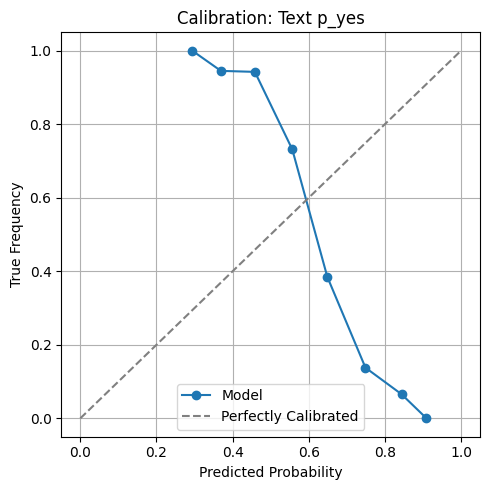

Expected Calibration Error (ECE): 0.4120
======================================== Metrics for Only_text Shift ========================================
Excluding 0 unknown responses out of 0
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: nan
Precision: nan
Recall: nan
Specificity: nan
Mean Entropy: nan ± nan
Mean Cross-Entropy: nan ± nan
Error plotting calibration for Only_text p_yes
======================================== Metrics for Only_image Shift ========================================
Excluding 0 unknown responses out of 10000


/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.6717
Precision: 0.6717
Recall: 1.0000
Specificity: 0.0000
Mean Entropy: 0.6912 ± 0.0000
Mean Cross-Entropy: 0.7164 ± 0.0584


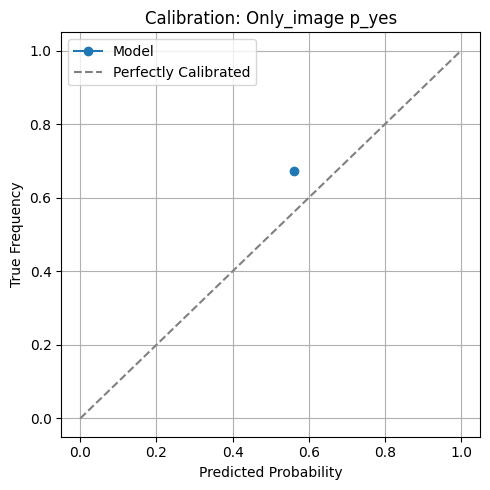

Expected Calibration Error (ECE): 0.1095



Error in calibration for Only Text: y_true takes value in {} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.


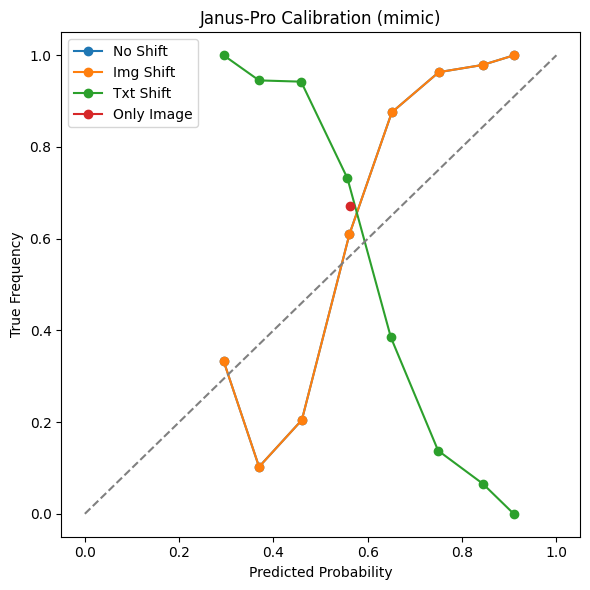

======================================== Metrics for llama3_10b ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 5000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8746
Precision: 0.9244
Recall: 0.8856
Specificity: 0.8521
Mean Entropy: 0.6182 ± 0.0344
Mean Cross-Entropy: 1.0951 ± 0.2730


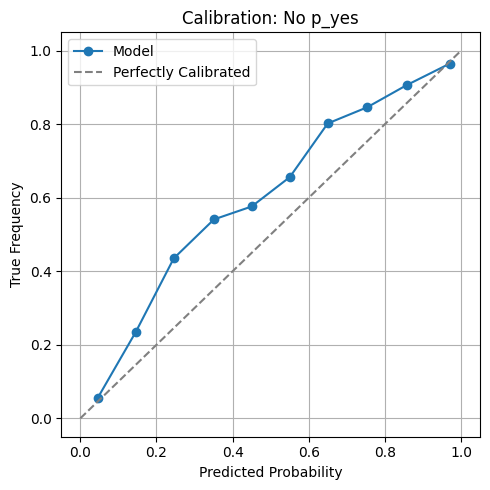

Expected Calibration Error (ECE): 0.0454
======================================== Metrics for Image Shift ========================================
Excluding 0 unknown responses out of 5000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8700
Precision: 0.9250
Recall: 0.8776
Specificity: 0.8545
Mean Entropy: 0.6218 ± 0.0348
Mean Cross-Entropy: 1.0773 ± 0.2735


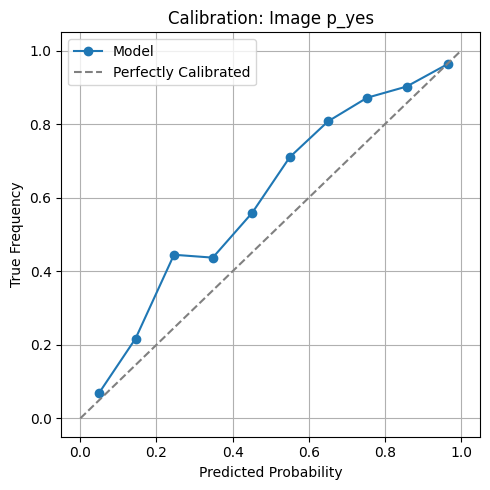

Expected Calibration Error (ECE): 0.0474
======================================== Metrics for Text Shift ========================================
Excluding 0 unknown responses out of 5000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.1464
Precision: 0.2680
Recall: 0.1567
Specificity: 0.1254
Mean Entropy: 0.6249 ± 0.0347
Mean Cross-Entropy: 0.4764 ± 0.2374


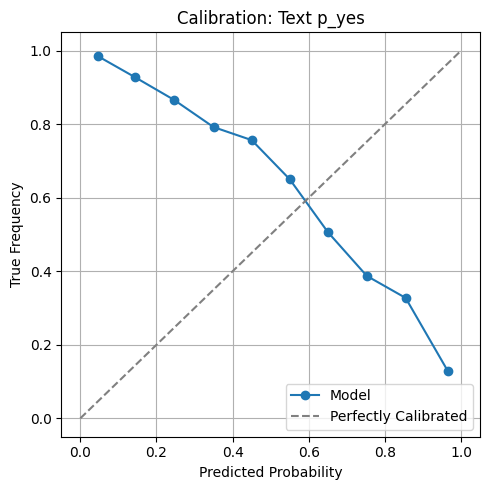

Expected Calibration Error (ECE): 0.7242
======================================== Metrics for Only_text Shift ========================================
Excluding 0 unknown responses out of 5000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8752
Precision: 0.9073
Recall: 0.9068
Specificity: 0.8107
Mean Entropy: 0.5935 ± 0.0255
Mean Cross-Entropy: 1.1686 ± 0.3096


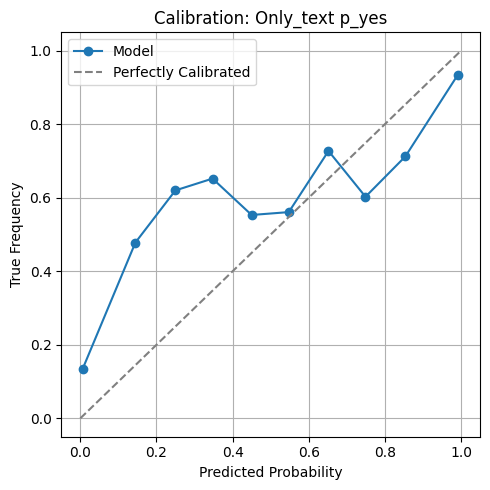

Expected Calibration Error (ECE): 0.0912
======================================== Metrics for Only_image Shift ========================================
Excluding 0 unknown responses out of 5000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.6720
Precision: 0.6723
Recall: 0.9979
Specificity: 0.0061
Mean Entropy: 0.6221 ± 0.0249
Mean Cross-Entropy: 0.9314 ± 0.3712


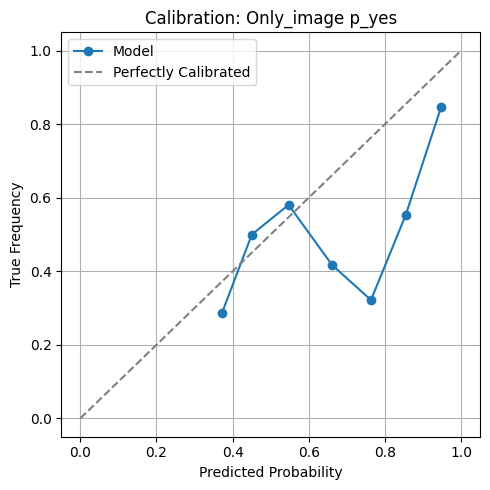

Expected Calibration Error (ECE): 0.2129





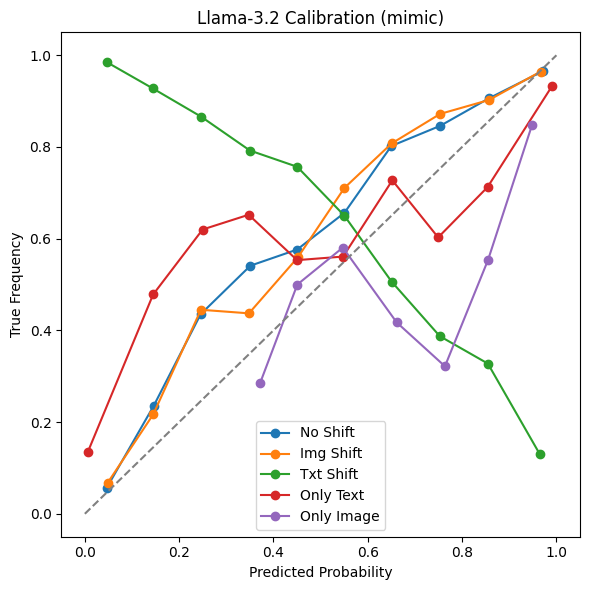

======================================== Metrics for llava_med_mistral_instruct ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8761
Precision: 0.8634
Recall: 0.9689
Specificity: 0.6863
Mean Entropy: 0.6645 ± 0.0188
Mean Cross-Entropy: 0.9126 ± 0.1682


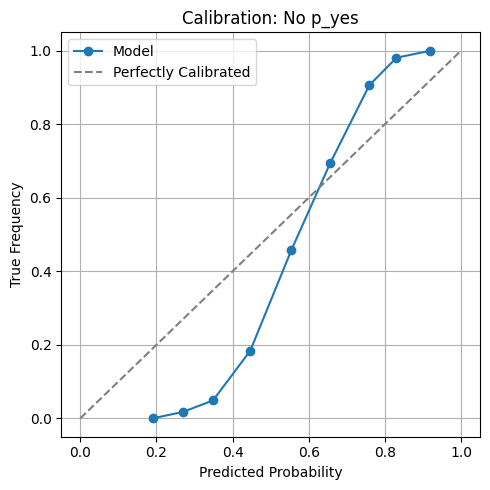

Expected Calibration Error (ECE): 0.1650
======================================== Metrics for Image Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8749
Precision: 0.8624
Recall: 0.9683
Specificity: 0.6838
Mean Entropy: 0.6649 ± 0.0186
Mean Cross-Entropy: 0.9104 ± 0.1675


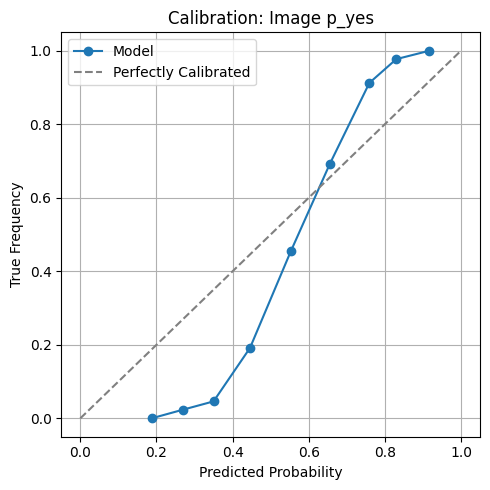

Expected Calibration Error (ECE): 0.1654
======================================== Metrics for Text Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.2120
Precision: 0.3885
Recall: 0.3018
Specificity: 0.0283
Mean Entropy: 0.6726 ± 0.0171
Mean Cross-Entropy: 0.5941 ± 0.1599


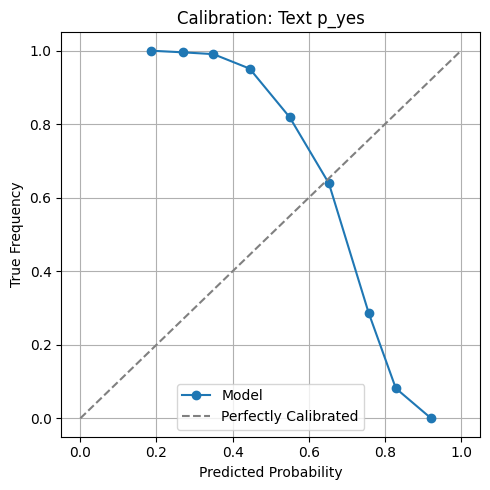

Expected Calibration Error (ECE): 0.5158
======================================== Metrics for Only_text Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8482
Precision: 0.8264
Recall: 0.9798
Specificity: 0.5790
Mean Entropy: 0.6537 ± 0.0260
Mean Cross-Entropy: 0.9484 ± 0.2147


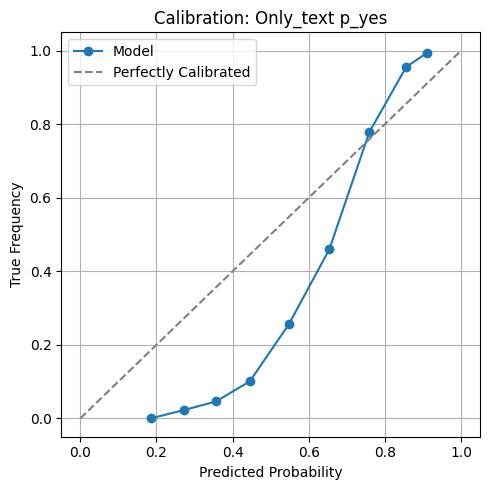

Expected Calibration Error (ECE): 0.1504
======================================== Metrics for Only_image Shift ========================================
Excluding 0 unknown responses out of 10000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.6717
Precision: 0.6717
Recall: 1.0000
Specificity: 0.0000
Mean Entropy: 0.6647 ± 0.0042
Mean Cross-Entropy: 0.8060 ± 0.2274


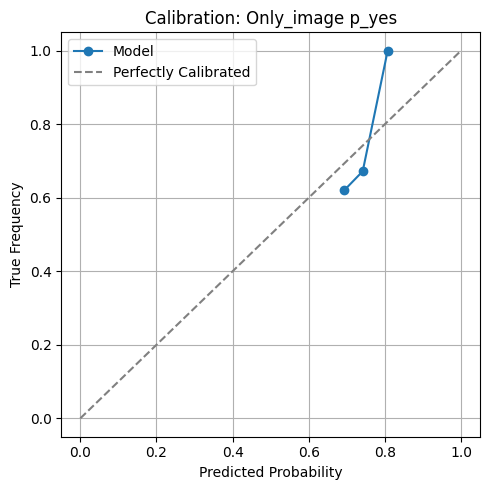

Expected Calibration Error (ECE): 0.0699





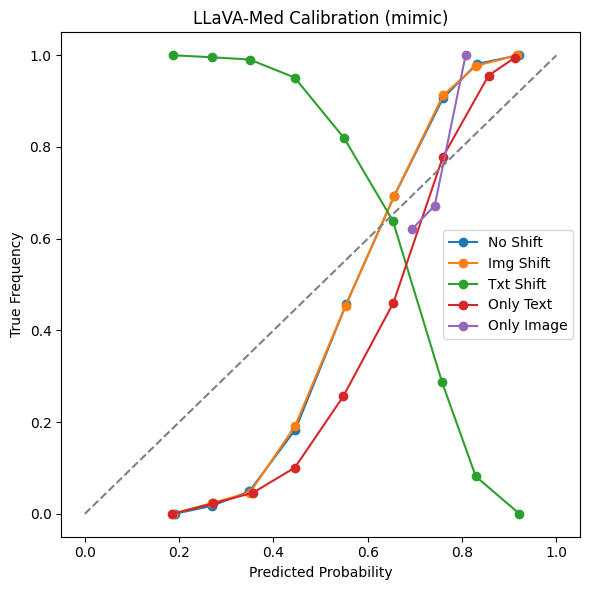

======================================== Metrics for medgemma ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 5000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8416
Precision: 0.9505
Recall: 0.8061
Specificity: 0.9142
Mean Entropy: 0.5874 ± 0.0174
Mean Cross-Entropy: 1.1454 ± 0.3559


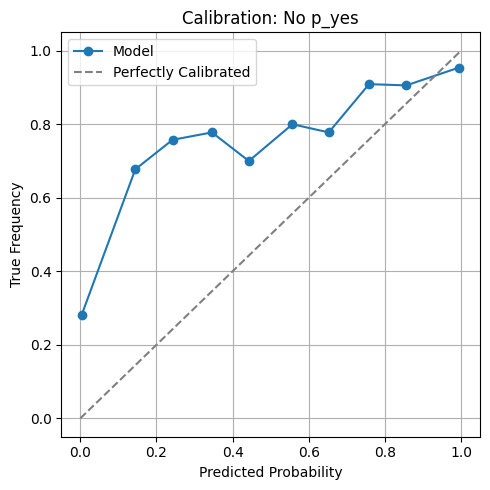

Expected Calibration Error (ECE): 0.1487
======================================== Metrics for Image Shift ========================================
Excluding 0 unknown responses out of 5000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8204
Precision: 0.9460
Recall: 0.7769
Specificity: 0.9093
Mean Entropy: 0.5890 ± 0.0204
Mean Cross-Entropy: 1.1220 ± 0.3717


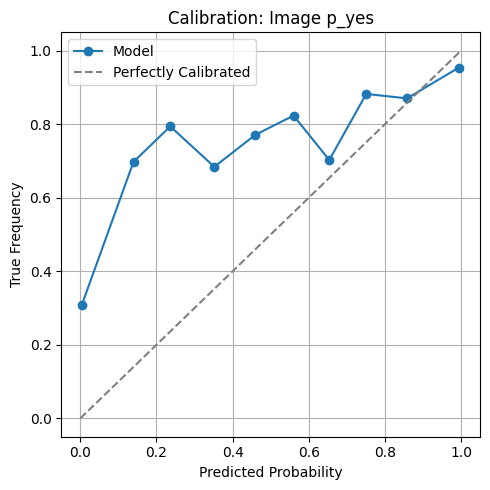

Expected Calibration Error (ECE): 0.1650
======================================== Metrics for Text Shift ========================================
Excluding 0 unknown responses out of 5000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.1418
Precision: 0.2029
Recall: 0.0950
Specificity: 0.2374
Mean Entropy: 0.5876 ± 0.0185
Mean Cross-Entropy: 0.4534 ± 0.3302


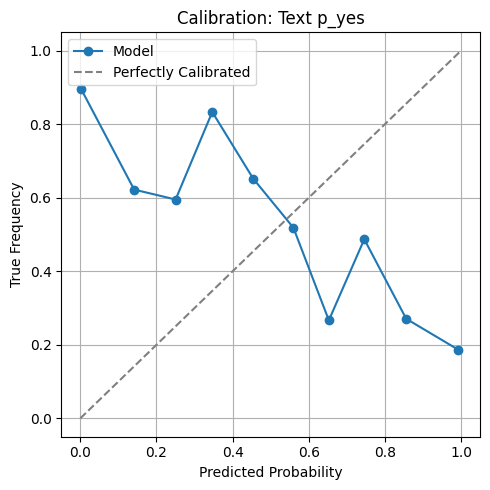

Expected Calibration Error (ECE): 0.8408
======================================== Metrics for Only_text Shift ========================================
Excluding 0 unknown responses out of 5000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.8594
Precision: 0.9294
Recall: 0.8555
Specificity: 0.8673
Mean Entropy: 0.5866 ± 0.0169
Mean Cross-Entropy: 1.1670 ± 0.3388


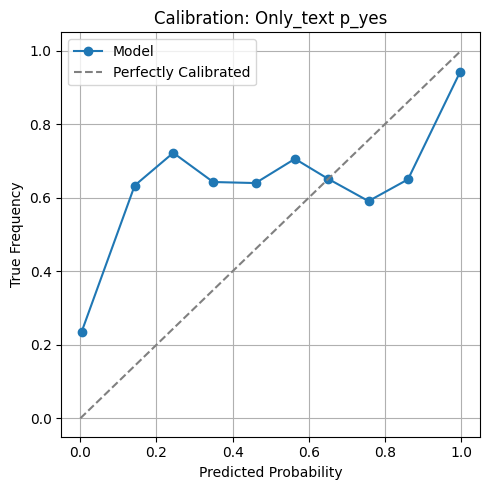

Expected Calibration Error (ECE): 0.1275
======================================== Metrics for Only_image Shift ========================================
Excluding 0 unknown responses out of 5000
======================================== Overall Metrics for First Token Probability yes ========================================
Accuracy: 0.7782
Precision: 0.8208
Recall: 0.8567
Specificity: 0.6178
Mean Entropy: 0.5903 ± 0.0221
Mean Cross-Entropy: 1.0790 ± 0.4000


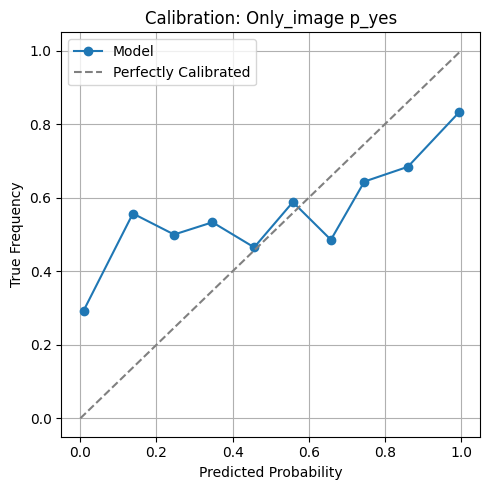

Expected Calibration Error (ECE): 0.1963





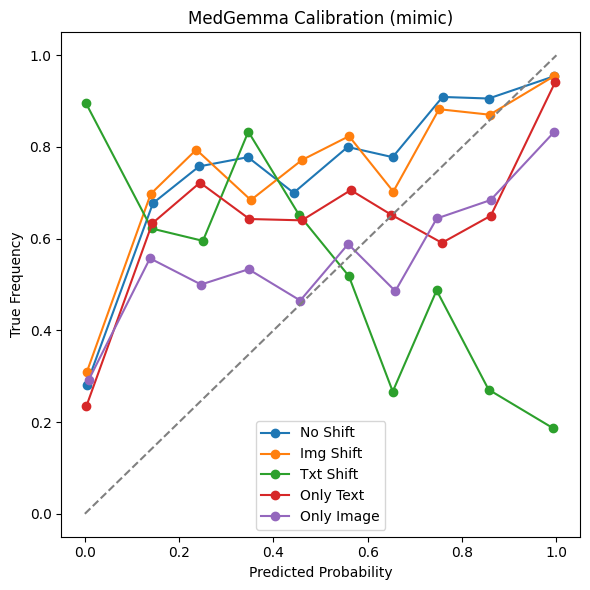

In [1]:
from src.test import calculate_metrics_all_models

# Define model list
model_dict = {
    #"Qwen/Qwen2-VL-2B-Instruct": "qwen2_vl_2b",
    "Qwen/Qwen2-VL-7B-Instruct": "qwen2_vl_7b",
    "llava-hf/llava-1.5-7b-hf": "llava_1_5_7b",
    #"llava-hf/llava-v1.6-mistral-7b-hf": "llava_1_6_mistral",
    #"llava-hf/llava-v1.6-vicuna-7b-hf": "llava_1_6_vicuna",
    #"llava-hf/llama3-llava-next-8b-hf": "llama3_llava_8b",
    #"google/paligemma2-10b-pt-224": 'paligemma2_10b',
    #"google/paligemma2-3b-pt-22": 'paligemma2_3b',
    "deepseek-ai/Janus-Pro-7B": 'janus_pro_7b',
    "meta-llama/Llama-3.2-11B-Vision-Instruct": "llama3_10b",
    #"PanaceaAI/BiomedGPT-Base-Pretrained": "biomedgpt",
    "microsoft/llava-med-v1.5-mistral-7b": "llava_med_mistral_instruct",
    "google/medgemma-4b-it": 'medgemma',
}

data = calculate_metrics_all_models(model_dict, results_dir='results', dataset="mimic", subgroup_variables=[], counterfactual=True, first_token=True, confusion_matrix=False, show_unknown_responses=False, p_yes=True, calibration=True)

In [2]:
data

{'Qwen-2 VL': {'No Shift': {'Accuracy': 0.8294,
   'Precision': 0.9433728543620599,
   'Recall': 0.7936578829834747,
   'F1': 0.8620633893919794,
   'Specificity': 0.9025281754492842,
   'ECE': 0.1271473504019803},
  'Img Shift': {'Accuracy': 0.8289,
   'Precision': 0.9436370081531372,
   'Recall': 0.7926157510793509,
   'F1': 0.8615583785095882,
   'Specificity': 0.9031373743527261,
   'ECE': 0.12763082918760185},
  'Txt Shift': {'Accuracy': 0.1331,
   'Precision': 0.1978328173374613,
   'Recall': 0.09513175524787852,
   'F1': 0.12848094902985824,
   'Specificity': 0.21078282059092293,
   'ECE': 0.772445297677935},
  'Only Text': {'Accuracy': 0.7993,
   'Precision': 0.9466995447647951,
   'Recall': 0.7430400476403156,
   'F1': 0.8325965468345984,
   'Specificity': 0.9144075540664027,
   'ECE': 0.16281537662736467},
  'Only Image': {'Accuracy': 0.4917,
   'Precision': 0.7650876054510058,
   'Recall': 0.35104957570343903,
   'F1': 0.48127359934687214,
   'Specificity': 0.779469996954005

### P(yes)

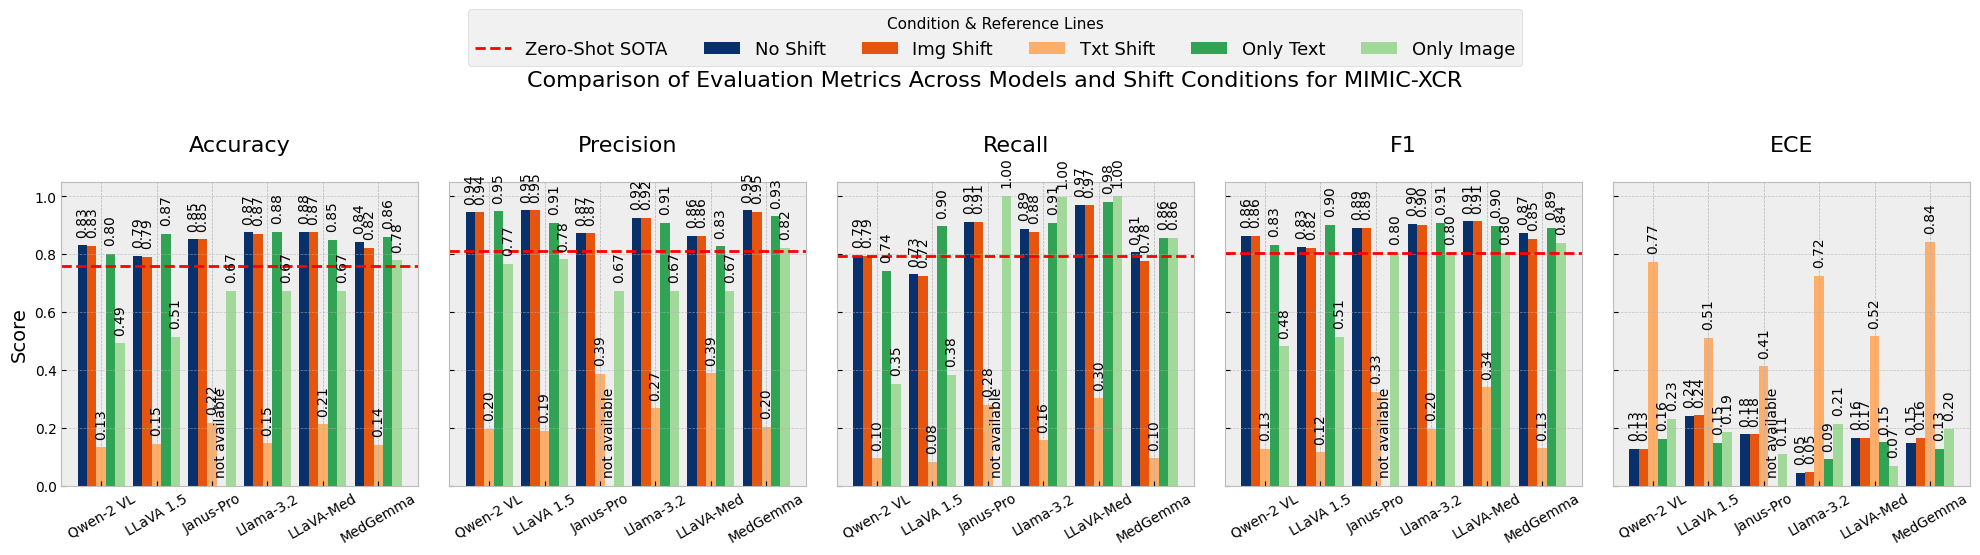

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use a clean style for a professional look
plt.style.use('bmh')

# Sample data (replace with your actual computed values)
models = ["Qwen-2 VL", "LLaVA 1.5", "Janus-Pro", "Llama-3.2", "LLaVA-Med", "MedGemma"]
shifts = ["No Shift", "Img Shift", "Txt Shift", "Only Text", "Only Image"]
metrics = ["Accuracy", "Precision", "Recall", "F1", "ECE"]

# Data structure: {model: {shift: {metric: value}}} with actual MIMIC values
data

# Compute F1 for each model/shift from Precision and Recall
for model in data:
    for shift in data[model]:
        p = data[model][shift]["Precision"]
        r = data[model][shift]["Recall"]
        if np.isnan(p) or np.isnan(r):
            data[model][shift]["F1"] = np.nan
        elif (p + r == 0):
            data[model][shift]["F1"] = 0
        else:
            data[model][shift]["F1"] = 2 * p * r / (p + r)

# Define zero-shot and in-context SOTA values (converted to decimals)
# Harvard-FairVLMed:
SOTA_zero_shot = {"Accuracy": 0.7579, "Precision": 0.8101, "Recall": 0.7938, "F1": 0.8049, "ECE": np.nan}
SOTA_in_context = {"Accuracy": 0.8392, "Precision": 0.8701, "Recall": 0.8289, "F1": 0.8749, "ECE": np.nan}


# Define colors for bar groups
shift_colors = {
    "No Shift": "#08306B",
    "Img Shift": "#E6550D",
    "Txt Shift": "#FDAE6B",
    "Only Text": "#31A354",
    "Only Image": "#A1D99B"
}

fig, axs = plt.subplots(1, len(metrics), figsize=(20, 5), sharey=True)

for idx, metric in enumerate(metrics):
    ax = axs[idx]
    x = np.arange(len(models))
    width = 0.17  # Width of each bar

    # Plot bars for each shift condition
    for i, shift in enumerate(shifts):
        values = [data[model][shift][metric] for model in models]
        bars = ax.bar(x + i * width, values, width, label=shift, color=shift_colors[shift])
        
        # Annotate bars
        for bar in bars:
            yval = bar.get_height()
            if np.isnan(yval):
                label_text = "not available"
                yval = 0.0
            elif yval == 0:
                label_text = "0"
            else:
                label_text = f"{yval:.2f}"
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.03, label_text, 
                    ha='center', va='bottom', fontsize=10, rotation=90)

    # Add horizontal lines for zero-shot and in-context SOTA
    ax.axhline(y=SOTA_zero_shot[metric], color='red', linestyle='--', label='Zero-Shot SOTA')
    #ax.axhline(y=SOTA_in_context[metric], color='green', linestyle=':', label='In-Context SOTA')

    ax.set_xticks(x + (len(shifts) - 1) * width / 2)
    ax.set_xticklabels(models, fontsize=10, rotation=30)
    ax.set_title(metric, fontsize=16, pad=22)
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    if idx == 0:
        ax.set_ylabel("Score", fontsize=14)

# Extract handles and labels from the last subplot to combine into a single legend
handles1, labels1 = axs[-1].get_legend_handles_labels()
# Some handles will be duplicates from repeated axhline calls; use dict to preserve unique order
unique = dict(zip(labels1, handles1))
fig.legend(unique.values(), unique.keys(),
           title="Condition & Reference Lines",
           loc='upper center', ncol=2 + len(shifts),
           fontsize=13, title_fontsize=11, bbox_to_anchor=(0.5, 1.12))

fig.suptitle("Comparison of Evaluation Metrics Across Models and Shift Conditions for MIMIC-XCR", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("images/metrics_mimic_p_yes_sota.png", bbox_inches="tight", dpi=300)
plt.show()

In [4]:
from src.test import compute_nfr_all_models, plot_nfr_heatmap

# Define model list
model_dict = {
    "Qwen/Qwen2-VL-7B-Instruct": "qwen2_vl_7b",
    "llava-hf/llava-1.5-7b-hf": "llava_1_5_7b",
    #"llava-hf/llava-v1.6-mistral-7b-hf": "llava_1_6_mistral",
    #"llava-hf/llava-v1.6-vicuna-7b-hf": "llava_1_6_vicuna",
    #"llava-hf/llama3-llava-next-8b-hf": "llama3_llava_8b",
    #"google/paligemma2-10b-pt-224": 'paligemma2_10b',
    #"google/paligemma2-3b-pt-22": 'paligemma2_3b',
    "deepseek-ai/Janus-Pro-7B": 'janus_pro_7b',
    "meta-llama/Llama-3.2-11B-Vision-Instruct": "llama3_10b",
    
    #"PanaceaAI/BiomedGPT-Base-Pretrained": "biomedgpt",
    "microsoft/llava-med-v1.5-mistral-7b": "llava_med_mistral_instruct",
    "google/medgemma-4b-it": 'medgemma'
}

nfr_matrix = compute_nfr_all_models(model_dict,
                                    results_dir="results",
                                    dataset="mimic",
                                    id="dicom_id",
                                   first_token=True,
                                   p_yes=False)


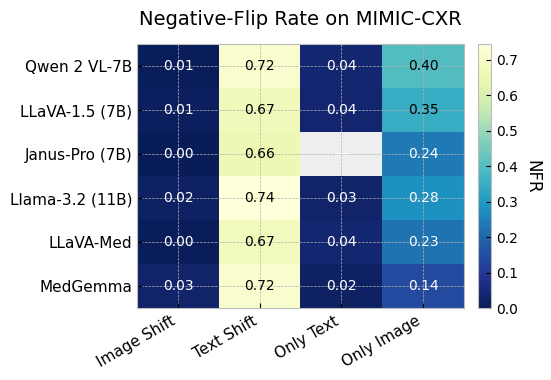

In [5]:
pretty_names = {
    "qwen2_vl_7b":        "Qwen 2 VL-7B",
    "llava_1_5_7b":       "LLaVA-1.5 (7B)",
    "paligemma2_10b":     "PaliGemma-2 (10B)",
    "janus_pro_7b":       "Janus-Pro (7B)",
    "biomedgpt":          "BiomedGPT",
    "llava_med_mistral_instruct": "LLaVA-Med",
    "medgemma":           "MedGemma",
    "llama3_10b":         "Llama-3.2 (11B)",
}

plot_nfr_heatmap(nfr_matrix,
                 dataset_name="MIMIC-CXR",
                 model_name_map=pretty_names,
                 save_path="images/nfr_mimic_heatmap_p_Yes.png")


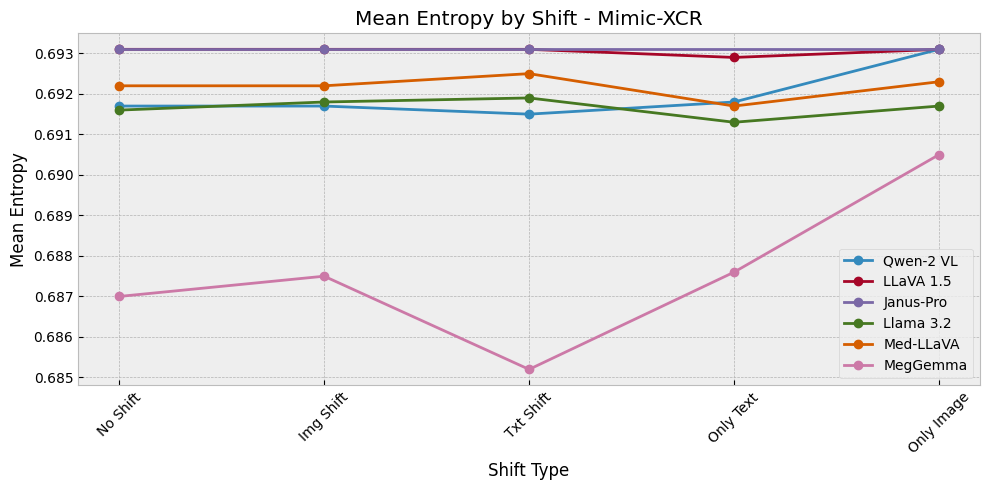

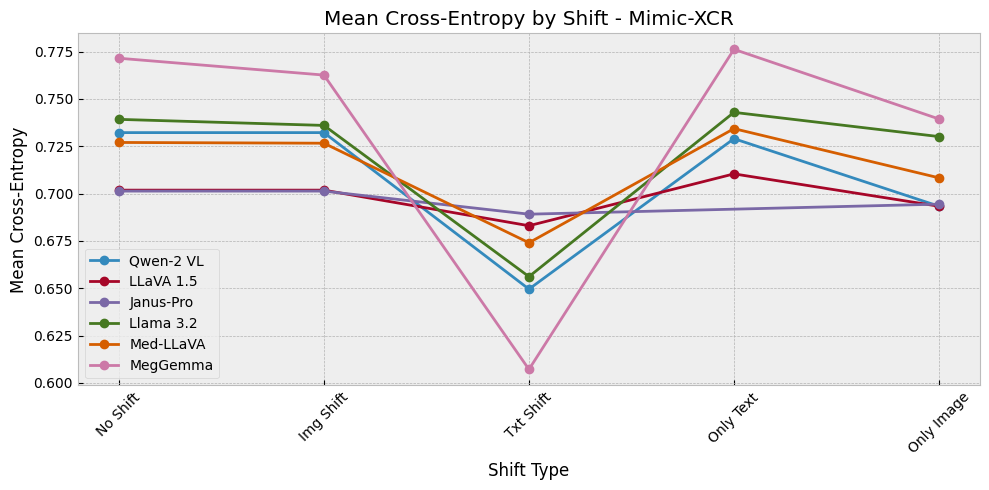

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Data extracted from the logs for p_yes values
data = {
    "Model": [
        "Qwen-2 VL", "Qwen-2 VL", "Qwen-2 VL", "Qwen-2 VL", "Qwen-2 VL",
        "LLaVA 1.5", "LLaVA 1.5", "LLaVA 1.5", "LLaVA 1.5", "LLaVA 1.5",
        "Janus-Pro", "Janus-Pro", "Janus-Pro", "Janus-Pro", "Janus-Pro",
        "Llama 3.2", "Llama 3.2", "Llama 3.2", "Llama 3.2", "Llama 3.2",
        "Med-LLaVA", "Med-LLaVA", "Med-LLaVA", "Med-LLaVA", "Med-LLaVA",
        "MegGemma", "MegGemma", "MegGemma", "MegGemma", "MegGemma"
    ],
    "Shift": ["No Shift", "Img Shift", "Txt Shift", "Only Text", "Only Image"] * 6,
    "Entropy": [
        0.6917, 0.6917, 0.6915, 0.6918, 0.6931,
        0.6931, 0.6931, 0.6931, 0.6929, 0.6931,
        0.6931, 0.6931, 0.6931, None, 0.6931,
        0.6916, 0.6918, 0.6919, 0.6913, 0.6917,
        0.6922, 0.6922, 0.6925, 0.6917, 0.6923,
        0.6870, 0.6875, 0.6852, 0.6876, 0.6905
    ],
    "CrossEntropy": [
        0.7322, 0.7322, 0.6495, 0.7290, 0.6933,
        0.7018, 0.7018, 0.6830, 0.7104, 0.6933,
        0.7013, 0.7013, 0.6891, None, 0.6944,
        0.7392, 0.7360, 0.6561, 0.7429, 0.7301,
        0.7270, 0.7266, 0.6740, 0.7343, 0.7083,
        0.7715, 0.7626, 0.6071, 0.7762, 0.7394
    ]
}

df = pd.DataFrame(data)

# Drop rows with missing values
df = df.dropna()

# Plotting mean entropy per shift
plt.figure(figsize=(10, 5))
for model in df['Model'].unique():
    model_df = df[df['Model'] == model]
    plt.plot(model_df['Shift'], model_df['Entropy'], marker='o', label=model)
plt.title("Mean Entropy by Shift - Mimic-XCR")
plt.xlabel("Shift Type")
plt.ylabel("Mean Entropy")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting mean cross-entropy per shift
plt.figure(figsize=(10, 5))
for model in df['Model'].unique():
    model_df = df[df['Model'] == model]
    plt.plot(model_df['Shift'], model_df['CrossEntropy'], marker='o', label=model)
plt.title("Mean Cross-Entropy by Shift - Mimic-XCR")
plt.xlabel("Shift Type")
plt.ylabel("Mean Cross-Entropy")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
